# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sakanti Dwi Bhanuwati
- **Email:** sakantiiidb@gmail.com
- **ID Dicoding:** sakanti_hi

#**Menentukan Pertanyaan Bisnis**

- Pertanyaan 1 : Bagaimana pengaruh cuaca (weathersit) terhadap jumlah total peminjaman sepeda (cnt)?
- Pertanyaan 2 : Bagaimana perbedaan jumlah peminjaman sepeda (cnt) antara akhir pekan dan hari kerja ?

# **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **Data Wrangling**

>### **Gathering Data**

#### Load data `day.csv`

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### load data `hour.csv`

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- load data day.csv dengan dataframe day_df
- load data hour.csv dengan dataframe hour_df

>### **Assessing Data**

#### menilai tabel `day_df`

In [4]:
# menilai tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
tabel day_df
- tidak ada missing value
- terdapat kesalahan tipe data pada dteday, season, yr, mnth, holiday, weekday, workingday, weathersit
- tidak ada duplikasi data
- tidak ada innacurate data

#### menilai tabel `hour_df`

In [6]:
# menilai tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight :**
tabel day_df
- tidak ada missing value
- terdapat kesalahan tipe data pada dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit
- tidak ada duplikasi data
- tidak ada innacurate data

>### **Cleaning Data**

#### Membersihkan tabel `day_df`

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# Mengubah tipe data dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'],format='%Y-%m-%d')
day_df['dteday'] = day_df['dteday'].dt.date

In [10]:
# Ubah nilai yr 0 = 2011 dan 1 = 2012
day_df['yr'] = day_df['yr'].apply(lambda x: 2011 if x == 0 else 2012)

In [11]:
# Mengubah tipe data season,yr,mnth, holiday, weekday, workingday, weathersit ke category
day_df[['season','yr','mnth', 'holiday', 'weekday', 'workingday', 'weathersit']] = day_df[['season', 'yr','mnth','holiday', 'weekday','workingday', 'weathersit']].astype('category')

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.9+ KB


In [13]:
# mapping season, weathersit, weekday

# Mapping untuk kolom season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)

# Mapping untuk kolom weathersit
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

# Mapping untuk kolom weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

In [14]:
# Denormalisasi kolom suhu, kelembapan, dan kecepatan angin
day_df['temp'] = day_df['temp'] * 41  # Suhu dalam Celsius
day_df['atemp'] = day_df['atemp'] * 50  # Suhu terasa dalam Celsius
day_df['hum'] = day_df['hum'] * 100  # Kelembapan (%)
day_df['windspeed'] = day_df['windspeed'] * 67  # Kecepatan angin

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Saturday,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,1,0,Sunday,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,1,0,Monday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,Tuesday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,Wednesday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Insight:**
day_df
- memperbaiki tipe data dteday ke datetime
- ubah nilai yr ke tahun
- memperbaiki tipe data season, yr, mnth, holiday, weekday, workingday, weathersit ke category
- mapping nilai season, weekday dan weathersit
- denormalisasi temp, atemp, hum, windspeed

#### Membersihkan tabel `hour_df`

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
# Mengubah tipe data dteday ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['dteday'] = hour_df['dteday'].dt.date

In [18]:
# Ubah nilai yr (0=2011 dan 1=2012) dan hr (1-24)
hour_df['yr'] = hour_df['yr'].apply(lambda x: 2011 if x == 0 else 2012)
hour_df['hr'] = hour_df['hr'].apply(lambda x: x+1)

In [19]:
# Mengubah tipe data season,yr, mnth, hr, holiday, weekday, workingday, weathersit ke category
hour_df[['season','yr','mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']] = hour_df[['season','yr','mnth','hr', 'holiday', 'weekday','workingday', 'weathersit']].astype('category')

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [21]:
# mapping season, weathersit, weekday

# Mapping untuk kolom season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mapping untuk kolom weathersit
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
hour_df['weathersit'] = hour_df['weathersit'].map(weather_mapping)

# Mapping untuk kolom weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

In [22]:
# Denormalisasi kolom suhu, kelembapan, dan kecepatan angin
hour_df['temp'] = hour_df['temp'] * 41  # Suhu dalam Celsius
hour_df['atemp'] = hour_df['atemp'] * 50  # Suhu terasa dalam Celsius
hour_df['hum'] = hour_df['hum'] * 100  # Kelembapan (%)
hour_df['windspeed'] = hour_df['windspeed'] * 67  # Kecepatan angin

In [23]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,1,0,Saturday,0,Clear/Partly Cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,2,0,Saturday,0,Clear/Partly Cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,3,0,Saturday,0,Clear/Partly Cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,4,0,Saturday,0,Clear/Partly Cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,5,0,Saturday,0,Clear/Partly Cloudy,9.84,14.395,75.0,0.0,0,1,1


**Insight :**
tabel hour_df
- memperbaiki tipe data dteday ke datetime
- ubah nilai yr ke tahun dan hr ke jam (1-24)
- memperbaiki tipe data season, yr, mnth, holiday, weekday, workingday, weathersit ke category
- mapping nilai season, weekday dan weathersit
- denormalisasi temp, atemp, hum, windspeed

## **Exploratory Data Analysis (EDA)**

#### Explore Data `day_df`

In [24]:
# mengambil sampel acak dari day_df
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,654,2012-10-15,Winter,2012,10,0,Monday,1,Mist/Cloudy,23.028347,26.95750,70.7500,19.834479,760,5115,5875
291,292,2011-10-19,Winter,2011,10,0,Wednesday,1,Light Rain/Snow,22.211299,25.69240,89.5217,16.303713,254,2170,2424
597,598,2012-08-20,Fall,2012,8,0,Monday,1,Mist/Cloudy,26.069153,29.79835,73.4167,8.708593,1026,5504,6530
470,471,2012-04-15,Summer,2012,4,0,Sunday,0,Clear/Partly Cloudy,24.873347,28.69375,50.7917,15.083643,2846,4286,7132
245,246,2011-09-03,Fall,2011,9,0,Saturday,0,Clear/Partly Cloudy,27.435847,31.66065,71.6667,12.416775,1935,2549,4484


In [25]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.0,731.0,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2.0,12.0,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,2012.0,1.0,0.0,Sunday,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366.0,62.0,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000


Berdasarkan rangkuman parameter statistik di atas, diperoleh informasi :
- jumlah pelanggan 731
- musim fall adalah musim yang paling banyak pelanggan
- rata-rata suhu 20-23 celcius
- rata-rata pelanggan perhari berjumlah 4504 dengan min pelanggan dalam sehari berjumlah 22 orang dan max pelaggan dalam sehari berjumlah 8714 orang

In [26]:
# demografi pelanggan berdasarkan season
day_df.groupby(['season','weathersit']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

<ipython-input-26-6c93ae6046b9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(['season','weathersit']).agg({


casual  registered     cnt
season weathersit                                     
Spring Clear/Partly Cloudy   41562      270474  312036
       Mist/Cloudy           18779      136794  155573
       Light Rain/Snow         281        3458    3739
Summer Clear/Partly Cloudy  146388      480598  626986
       Mist/Cloudy           56714      231382  288096
       Light Rain/Snow         420        3087    3507
Fall   Clear/Partly Cloudy  167945      631498  799443
       Mist/Cloudy           56407      194272  250679
       Light Rain/Snow        1739        9268   11007
Winter Clear/Partly Cloudy   90451      429036  519487
       Mist/Cloudy           37876      264634  302510
       Light Rain/Snow        1455       18161   19616

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan berdasarkan season dan weathersit paling banyak pada season fall dan weathersit clear/partly cloudy.

In [27]:
# demografi pelanggan berdasarkan weekday dan weekday
day_df.groupby(['weekday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

<ipython-input-27-9753ce921e05>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(['weekday']).agg({


,casual,registered,cnt
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790
Saturday,153852,323955,477807


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan berdasarkan hari cukup merata setiap harinya, namun pada weekend (sabtu dan minggu) pelanggan casual yang belum masuk dalam sistem lebih banyak dari hari biasanya. Sedangkan pelanggan registered tidak terlihat perbedaan signifikan di hari weekday dan weekend.

**Insight:**
tabel day_df
- pelanggan paling banyak di musim fall dengan cerah berawan
- pelanggan pada weekend juga mengalami kenaikan

#### Explore Data `hour_df`

In [28]:
# mengambil sampel acak dari hour_df
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10229,10230,2012-03-07,Spring,2012,3,8,0,Wednesday,1,Clear/Partly Cloudy,10.66,11.365,65.0,26.0027,12,332,344
11262,11263,2012-04-19,Summer,2012,4,12,0,Thursday,1,Clear/Partly Cloudy,21.32,25.000,48.0,0.0000,46,183,229
755,756,2011-02-03,Spring,2011,2,22,0,Thursday,1,Clear/Partly Cloudy,7.38,10.605,55.0,7.0015,1,53,54
12897,12898,2012-06-26,Fall,2012,6,15,0,Tuesday,1,Clear/Partly Cloudy,28.70,31.820,30.0,31.0009,81,186,267
3528,3529,2011-05-31,Summer,2011,5,23,0,Tuesday,1,Clear/Partly Cloudy,30.34,34.850,70.0,11.0014,42,117,159


In [29]:
# melihat rangkuman parameter statistik dari data day_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.0,17379.0,17379.0,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2.0,12.0,24.0,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,2012.0,5.0,18.0,0.0,Saturday,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734.0,1488.0,730.0,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000


Berdasarkan rangkuman parameter statistik di atas, diperoleh informasi :
- jumlah pelanggan 17379
- musim fall adalah musim yang paling banyak pelanggan
- rata-rata suhu 20-23 celcius
- jam 18 adalah jam paling tertinggi pelanggan
- rata-rata pelanggan perhari berjumlah 189 dengan min pelanggan dalam sehari berjumlah 1 orang dan max pelaggan dalam sehari berjumlah 977 orang

In [30]:
# demografi pelanggan berdasarkan season
hour_df.groupby(['season','weathersit']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

<ipython-input-30-f4e4a453cde3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(['season','weathersit']).agg({


casual  registered     cnt
season weathersit                                     
Spring Clear/Partly Cloudy   44462      280816  325278
       Mist/Cloudy           14760      109445  124205
       Light Rain/Snow        1392       20250   21642
       Heavy Rain/Snow           8         215     223
Summer Clear/Partly Cloudy  151197      513266  664463
       Mist/Cloudy           44912      162451  207363
       Light Rain/Snow        7413       39350   46763
       Heavy Rain/Snow           0           0       0
Fall   Clear/Partly Cloudy  174014      627927  801941
       Mist/Cloudy           42350      170582  212932
       Light Rain/Snow        9727       36529   46256
       Heavy Rain/Snow           0           0       0
Winter Clear/Partly Cloudy   93072      453419  546491
       Mist/Cloudy           32459      218993  251452
       Light Rain/Snow        4251       39419   43670
       Heavy Rain/Snow           0           0       0

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan berdasarkan season dan weathersit paling banyak pada season fall dan weathersit clear/partly cloudy.

In [31]:
# demografi pelanggan berdasarkan weekday dan weekday
hour_df.groupby(['weekday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

<ipython-input-31-b80800ce5cbc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(['weekday']).agg({


,casual,registered,cnt
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790
Saturday,153852,323955,477807


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan berdasarkan hari cukup merata setiap harinya, namun pada weekend (sabtu dan minggu) pelanggan casual yang belum masuk dalam sistem lebih banyak dari hari biasanya. Sedangkan pelanggan registered tidak terlihat perbedaan signifikan di hari weekday dan weekend.

**Insight:**
tabel hour_df
- jam 18 adalah waktu paling disukai pelanggan
- pelanggan paling banyak di musim fall dengan cerah berawan
- pelanggan pada weekend juga mengalami kenaikan

#### Explore all data `day_df` & `hour_df`

In [32]:
# menggabungkan data
day_hour_df = pd.concat([day_df,hour_df],axis=0)
day_hour_df.sort_values(by='dteday').head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,Spring,2011,1,0,Saturday,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,NaN
9,10,2011-01-01,Spring,2011,1,0,Saturday,0,Clear/Partly Cloudy,13.120000,17.42500,76.0000,0.000000,8,6,14,10
10,11,2011-01-01,Spring,2011,1,0,Saturday,0,Clear/Partly Cloudy,15.580000,19.69500,76.0000,16.997900,12,24,36,11
11,12,2011-01-01,Spring,2011,1,0,Saturday,0,Clear/Partly Cloudy,14.760000,16.66500,81.0000,19.001200,26,30,56,12
12,13,2011-01-01,Spring,2011,1,0,Saturday,0,Clear/Partly Cloudy,17.220000,21.21000,77.0000,19.001200,29,55,84,13


In [33]:
day_hour_df.to_csv("all_data.csv", index=False)

In [34]:
day_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     18110 non-null  int64   
 1   dteday      18110 non-null  object  
 2   season      18110 non-null  category
 3   yr          18110 non-null  category
 4   mnth        18110 non-null  category
 5   holiday     18110 non-null  category
 6   weekday     18110 non-null  category
 7   workingday  18110 non-null  category
 8   weathersit  18110 non-null  object  
 9   temp        18110 non-null  float64 
 10  atemp       18110 non-null  float64 
 11  hum         18110 non-null  float64 
 12  windspeed   18110 non-null  float64 
 13  casual      18110 non-null  int64   
 14  registered  18110 non-null  int64   
 15  cnt         18110 non-null  int64   
 16  hr          17379 non-null  category
dtypes: category(7), float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [35]:
# demografi pelanggan berdasarkan season
day_hour_df.groupby(['season','weathersit']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

<ipython-input-35-d992b0878cd9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_hour_df.groupby(['season','weathersit']).agg({


casual  registered      cnt
season weathersit                                      
Spring Clear/Partly Cloudy   86024      551290   637314
       Heavy Rain/Snow           8         215      223
       Light Rain/Snow        1673       23708    25381
       Mist/Cloudy           33539      246239   279778
Summer Clear/Partly Cloudy  297585      993864  1291449
       Heavy Rain/Snow           0           0        0
       Light Rain/Snow        7833       42437    50270
       Mist/Cloudy          101626      393833   495459
Fall   Clear/Partly Cloudy  341959     1259425  1601384
       Heavy Rain/Snow           0           0        0
       Light Rain/Snow       11466       45797    57263
       Mist/Cloudy           98757      364854   463611
Winter Clear/Partly Cloudy  183523      882455  1065978
       Heavy Rain/Snow           0           0        0
       Light Rain/Snow        5706       57580    63286
       Mist/Cloudy           70335      483627   553962

In [36]:
# demografi pelanggan berdasarkan weekday dan weekend
day_hour_df['day_type'] = day_hour_df['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
day = day_hour_df.groupby(['day_type','weekday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
day = day[(day['casual'] > 0) | (day['registered'] > 0) | (day['cnt'] > 0)]
day

<ipython-input-36-d2d225a5bd99>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day = day_hour_df.groupby(['day_type','weekday']).agg({


casual  registered     cnt
day_type weekday                              
Weekday  Monday     141568      769438  911006
         Tuesday    115686      822532  938218
         Wednesday  114638      831458  946096
         Thursday   122920      847870  970790
         Friday     156476      819104  975580
Weekend  Sunday     281042      607012  888054
         Saturday   307704      647910  955614

**Insight** : all data
- pelanggan paling banyak di musim fall cuaca clear/partly cloud
- pada weekend tidak terjadi lonjakan jumlah pelanggan, namun pelanggan terbanyak di hari jumat

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimana pengaruh cuaca (weathersit) terhadap jumlah total peminjaman sepeda (cnt)?

In [37]:
day_hour_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,day_type
5807,5808,2011-09-04,Fall,2011,9,0,Sunday,0,Clear/Partly Cloudy,28.70,33.335,74.0,8.9981,150,147,297,11,Weekend
6740,6741,2011-10-13,Winter,2011,10,0,Thursday,1,Light Rain/Snow,22.96,26.515,100.0,8.9981,16,53,69,11,Weekday
2405,2406,2011-04-15,Summer,2011,4,1,Friday,0,Clear/Partly Cloudy,16.40,20.455,76.0,0.0000,0,3,3,4,Weekday
15011,15012,2012-09-22,Fall,2012,9,0,Saturday,0,Clear/Partly Cloudy,30.34,33.335,51.0,22.0028,253,427,680,17,Weekend
4404,4405,2011-07-07,Fall,2011,7,0,Thursday,1,Clear/Partly Cloudy,31.98,37.120,62.0,0.0000,29,72,101,11,Weekday


In [38]:
# explanatory data
weather_counts = day_hour_df.groupby(['weathersit','season']).agg({
    "cnt": "sum"
})
weather_counts

<ipython-input-38-1aa4cfac05c1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = day_hour_df.groupby(['weathersit','season']).agg({


cnt
weathersit          season         
Clear/Partly Cloudy Spring   637314
                    Summer  1291449
                    Fall    1601384
                    Winter  1065978
Heavy Rain/Snow     Spring      223
                    Summer        0
                    Fall          0
                    Winter        0
Light Rain/Snow     Spring    25381
                    Summer    50270
                    Fall      57263
                    Winter    63286
Mist/Cloudy         Spring   279778
                    Summer   495459
                    Fall     463611
                    Winter   553962

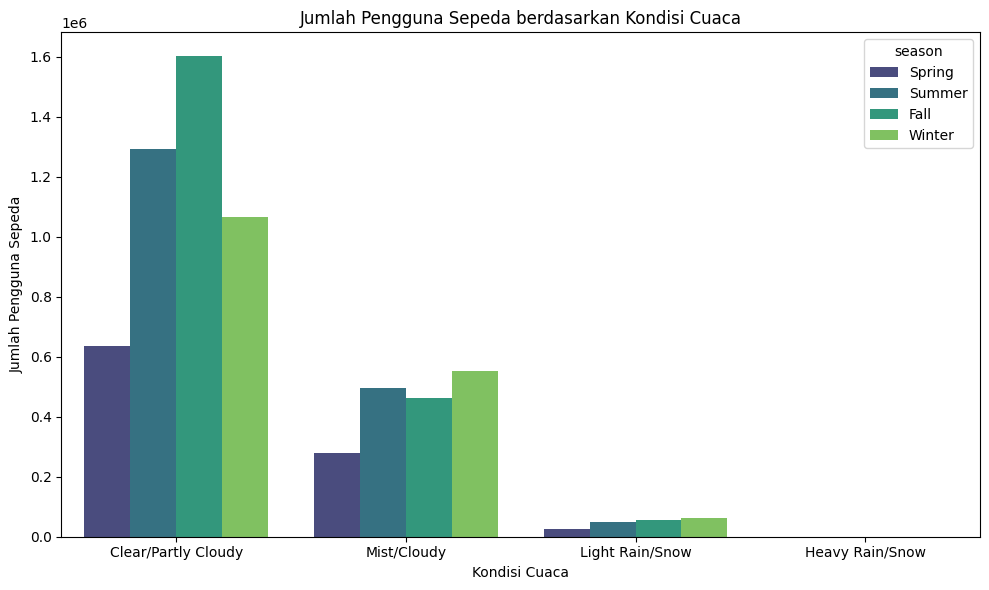

In [39]:
# Membuat barplot
weather_counts = weather_counts.sort_values(by='cnt', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt',hue='season', data=weather_counts, palette='viridis')
plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.tight_layout()
plt.show()

### Pertanyaan 2:  Bagaimana perbedaan jumlah peminjaman sepeda (cnt) antara akhir pekan dan hari kerja ?

In [40]:
day_hour_df['day_list'] = day_hour_df['workingday'].map({1: 'Weekday', 0: 'Weekend'})
weekday_workingday = day_hour_df.groupby('day_list').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()
weekday_workingday

<ipython-input-40-fdce3dfc8326>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_workingday = day_hour_df.groupby('day_list').agg({


,day_list,casual,registered,cnt
0,Weekend,633464,1367074,2000538
1,Weekday,606570,3978250,4584820


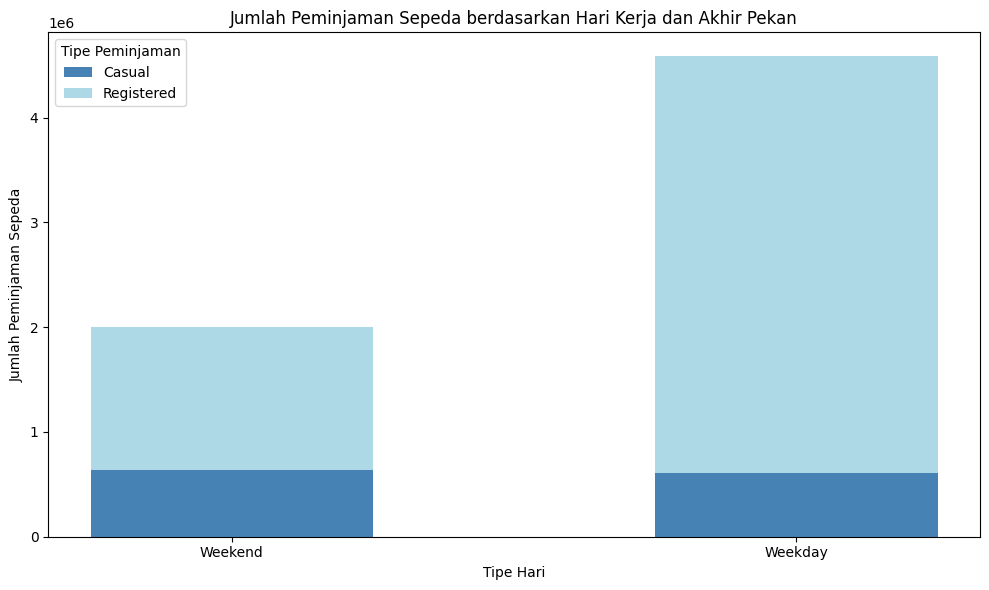

In [41]:
# Membuat visualisasi stacked bar chart
plt.figure(figsize=(10, 6))

# Menentukan posisi bar
bar_width = 0.5
x = range(len(weekday_workingday['day_list']))

# Bar untuk casual
plt.bar(x, weekday_workingday['casual'], width=bar_width, color='steelblue', label='Casual')

# Bar untuk registered, dengan offset
plt.bar(x, weekday_workingday['registered'], width=bar_width, bottom=weekday_workingday['casual'], color='lightblue', label='Registered')

# Menambahkan judul dan label
plt.title('Jumlah Peminjaman Sepeda berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(x, weekday_workingday['day_list'])  # Menyesuaikan label sumbu x
plt.legend(title='Tipe Peminjaman')
plt.tight_layout()
plt.show()

**Insight:**
- Cuaca yang cerah atau berawan ringan memiliki dampak positif pada jumlah peminjaman sepeda, karena pengguna lebih cenderung keluar di kondisi cuaca yang nyaman.
- Pada akhir pekan, jumlah peminjaman oleh pengguna kasual cenderung lebih tinggi karena digunakan untuk rekreasi, sedangkan pada hari kerja peminjaman didominasi oleh pengguna terdaftar yang memanfaatkan sepeda untuk perjalanan ke kantor atau aktivitas rutin.

## **Analisis Lanjutan**


melakukan clustering berdasarkan cuaca (weathersit), suhu (temp), kelembapan (hum), dan frekuensi penyewaan (cnt) menggunakan K-Means.

1. Pra-pemrosesan Data
Kolom yang dipilih untuk clustering adalah weathersit, temp, hum, dan cnt.

2. Standarisasi Data
Data distandarisasi agar setiap fitur memiliki skala yang sama (rata-rata 0 dan standar deviasi 1).

3. Menentukan Jumlah Cluster (Elbow Method)
Metode ini membantu menentukan jumlah cluster terbaik dengan memplot WCSS (Within-Cluster Sum of Squares) untuk 1 hingga 10 cluster.

4. Clustering dengan K-Means
Algoritma K-Means diterapkan dengan jumlah cluster yang optimal (misalnya, 3 cluster).

5. Visualisasi Hasil Clustering
Data divisualisasikan dalam 2D menggunakan fitur temp (suhu) dan hum (kelembapan).

In [42]:
# Mengonversi kolom `weathersit` menjadi kategori numerik untuk clustering
weather_numeric_mapping = {
    'Clear/Partly Cloudy': 1,
    'Mist/Cloudy': 2,
    'Light Rain/Snow': 3,
    'Heavy Rain/Snow': 4
}
day_hour_df['weathersit'] = day_hour_df['weathersit'].map(weather_numeric_mapping).astype(float)
day_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     18110 non-null  int64   
 1   dteday      18110 non-null  object  
 2   season      18110 non-null  category
 3   yr          18110 non-null  category
 4   mnth        18110 non-null  category
 5   holiday     18110 non-null  category
 6   weekday     18110 non-null  category
 7   workingday  18110 non-null  category
 8   weathersit  18110 non-null  float64 
 9   temp        18110 non-null  float64 
 10  atemp       18110 non-null  float64 
 11  hum         18110 non-null  float64 
 12  windspeed   18110 non-null  float64 
 13  casual      18110 non-null  int64   
 14  registered  18110 non-null  int64   
 15  cnt         18110 non-null  int64   
 16  hr          17379 non-null  category
 17  day_type    18110 non-null  object  
 18  day_list    18110 non-null  category
dtypes: catego

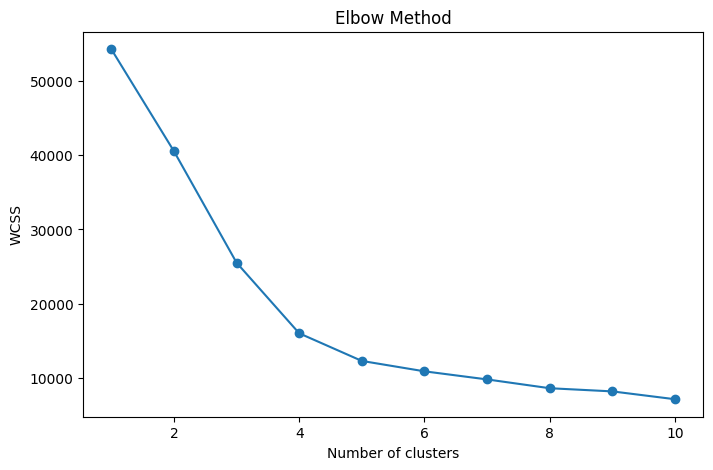

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Pra-pemrosesan data
# Menghapus nilai NaN pada kolom yang relevan
day_hour_df = day_hour_df.dropna(subset=[ 'temp', 'hum', 'cnt'])

# Memilih fitur untuk clustering
features = [ 'temp', 'hum', 'cnt']
X = day_hour_df[features]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster dengan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method (Grafik atas) untuk menentukan jumlah cluster optimal dalam algoritma K-Means.
* Sumbu horizontal (X) menunjukkan jumlah cluster, dari 1 hingga 10.
* Sumbu vertikal (Y) menunjukkan nilai WCSS (Within-Cluster Sum of Squares), yaitu ukuran total jarak antar data dalam cluster terhadap pusatnya.

Setelah titik tertentu (sekitar 3 cluster), penurunan WCSS menjadi lebih lambat. Ini disebut "titik siku" (elbow), yang menunjukkan jumlah cluster optimal. Maka didapat 3 cluster yang dapat digunakan.

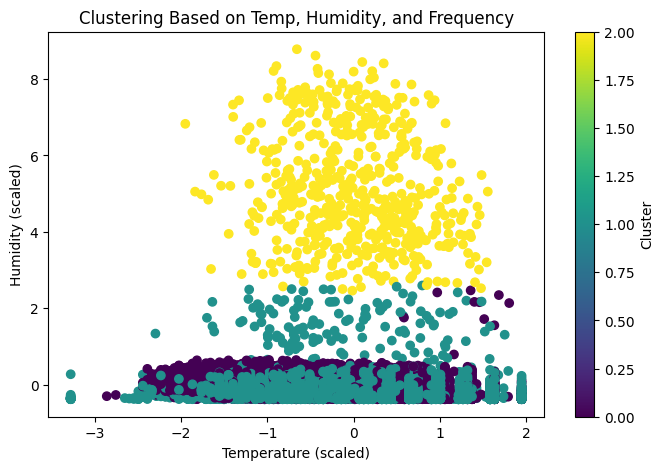

,temp,hum,cnt,Cluster
0,14.110847,80.5833,985,1
1,14.902598,69.6087,801,1
2,8.050924,43.7273,1349,1
3,8.200000,59.0435,1562,1
4,9.305237,43.6957,1600,1
5,8.378268,51.8261,1606,1
6,8.057402,49.8696,1510,1
7,6.765000,53.5833,959,1
8,5.671653,43.4167,822,1
9,6.184153,48.2917,1321,1


In [44]:
# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Pilih jumlah cluster (misal: 3)
day_hour_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering (2D)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=day_hour_df['Cluster'], cmap='viridis')
plt.title('Clustering Based on Temp, Humidity, and Frequency')
plt.xlabel('Temperature (scaled)')
plt.ylabel('Humidity (scaled)')
plt.colorbar(label='Cluster')
plt.show()

# Analisis hasil clustering (opsional)
# Tampilkan beberapa baris data untuk interpretasi
day_hour_df[[ 'temp', 'hum', 'cnt', 'Cluster']].head(20)

In [45]:
# Meghitung jumlah data dalam setiap cluster
cluster_counts = day_hour_df.groupby('Cluster')['Cluster'].count()
print(cluster_counts)

Cluster
0    9060
1    8476
2     574
Name: Cluster, dtype: int64


Berdasarkan pola yang tampak, Setiap cluster memiliki karakteristik suhu dan kelembaban yang berbeda.
* Cluster 2 (kuning) : Dingin dan Lembap.

Dicirikan oleh suhu rendah (nilai X negatif) dan kelembapan tinggi (nilai Y positif). Frekuensi penyewaan (cnt) pada cluster ini cenderung rendah. Hal ini menunjukkan bahwa sebagian besar pengguna lebih memilih untuk tidak menyewa sepeda dalam kondisi cuaca yang dingin dan lembap.

* Cluster 1 (Hijau) : Sedang dan Seimbang.

Dicirikan oleh suhu dan kelembaban yang moderat.Frekuensi penyewaan (cnt) pada cluster ini cenderung stabil. Hal ini menunjukkan bahwa dalam kondisi cuaca yang sedang, minat masyarakat untuk menyewa sepeda cukup konsisten.

* Cluster 0 (Ungu) : Hangat dan Kering.

Dicirikan oleh suhu tinggi (nilai X positif) dan kelembapan rendah (nilai Y negatif). Frekuensi penyewaan (cnt) pada cluster ini cenderung tinggi. Hal ini menunjukkan bahwa pengguna sangat menyukai cuaca yang hangat dan kering untuk bersepeda.



## Conclusion

Secara keseluruhan, pemahaman tentang bagaimana cuaca dan jenis hari mempengaruhi pola peminjaman sepeda dapat membantu dalam pengembangan kebijakan dan strategi yang lebih baik untuk meningkatkan penggunaan sepeda di masyarakat.

- Dalam kondisi cuaca yang nyaman, pengguna lebih cenderung untuk keluar dan menggunakan sepeda, yang menunjukkan bahwa faktor cuaca memainkan peran penting dalam keputusan pengguna untuk menyewa sepeda.

**Promosi**: Memberikan diskon pada hari-hari dengan cuaca buruk untuk menarik pengguna.\
**Manajemen Stok**: Memastikan lebih banyak sepeda tersedia pada hari-hari dengan cuaca yang mendukung.
- mencerminkan pergeseran dalam pola penggunaan sepeda berdasarkan jenis hari, di mana sepeda berfungsi sebagai moda transportasi yang praktis selama hari kerja.

**Perencanaan Operasional**: Menyediakan lebih banyak sepeda di area wisata atau rekreasi selama akhir pekan.\
**Segmentasi Pengguna**: Menargetkan promosi khusus untuk pengguna kasual di akhir pekan dan pengguna terdaftar pada hari kerja.